iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44


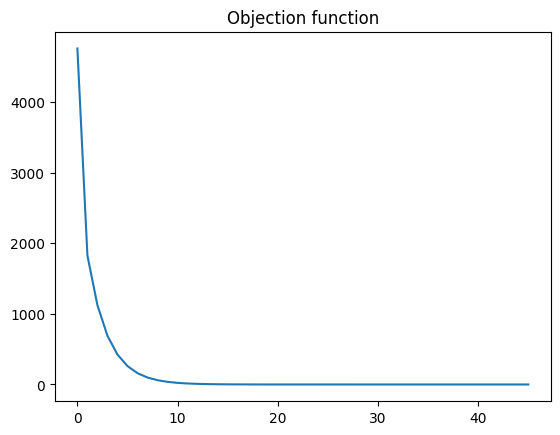

In [9]:
import numpy as np
import pyproximal
import pylops
import matplotlib.pyplot as plt
import time

#switch objection function

#quadratic
def x_step_prox(q0k):
    quad = pyproximal.Quadratic(Op=pylops.MatrixMult(np.identity(H0.shape[0])))
    xk1 = pyproximal.optimization.primal.ProximalPoint(quad, q0k, r, show=False)
    return xk1

#Log
# def x_step_prox(q0k):
#     l1 = pyproximal.Log(sigma=0.5, gamma=1.3)
#     xk1 = pyproximal.optimization.primal.ProximalPoint(l1, q0k, r, show=False)
#     return xk1

#L1
# def x_step_prox(q0k):
#     l1 = pyproximal.L1(sigma=1.0)
#     xk1 = pyproximal.optimization.primal.ProximalPoint(l1, q0k, r, show=False)
#     return xk1

#SCAD
# def x_step_prox(q0k):
#     box = pyproximal.Box(lower=-float('inf'), upper=float('inf'))
#     xk1 = pyproximal.optimization.primal.ProximalPoint(box, q0k, r, show=False)
#     return xk1

#SCAD
# def x_step_prox(q0k):
#     box = pyproximal.SCAD(sigma=1.0, a=3.7)
#     xk1 = pyproximal.optimization.primal.ProximalPoint(box, q0k, r, show=False)
#     return xk1


def BALM(A, b, r, x0, lambda0):
    improvement = []
    xk = x0
    lambdak = lambda0
    for i in range(100):
        q0k = xk + (1/r) * A.T @ lambdak
        xk1 = x_step_prox(q0k)
        s0k = A @ (2*xk1 - xk) - b
        lambdak1 = lambdak - H0_inv @ s0k
        error = np.sum(np.abs(xk - xk1))
        improvement.append(error)
        if error < 1e-6:
            plt.plot(improvement)
            plt.title('Objection function')
            #plt.title('Objection function: L1-Norm')
            plt.show()
            return xk1
        xk = xk1
        lambdak = lambdak1
        print(f"iteration {i}")
    return xk

A = np.array([
    [1, 2, -3, 4, 5, 6, 7],
    [-11, 12, 13, 14, 15, 16, 17],
    [21, -22, 23, 24, 25, 26, -27],
    [31, 32, 33, -34, 35, 36, 37],
    [41, 42, 43, 44, 45, 46, 47],
    [51, 52, -53, 54, 55, 56, 57],
    [61, 62, 63, 64, -65, 66, 67]
])
b = np.array([ 122 , 398 , 234  ,708 ,1260 ,1222, 1170])
r = 0.1
delta = 0.001 
x0 = np.array([1,1,1,1,1,1,1])
lambda0 = np.array([1,1,1,1,1,1,1])
start_time = time.time()
xk = BALM(A,b,r,x0,lambda0)
end_time = time.time()
elapsed_time = end_time - start_time
# print("Elapsed time:", elapsed_time, "seconds")
# print(A@xk)

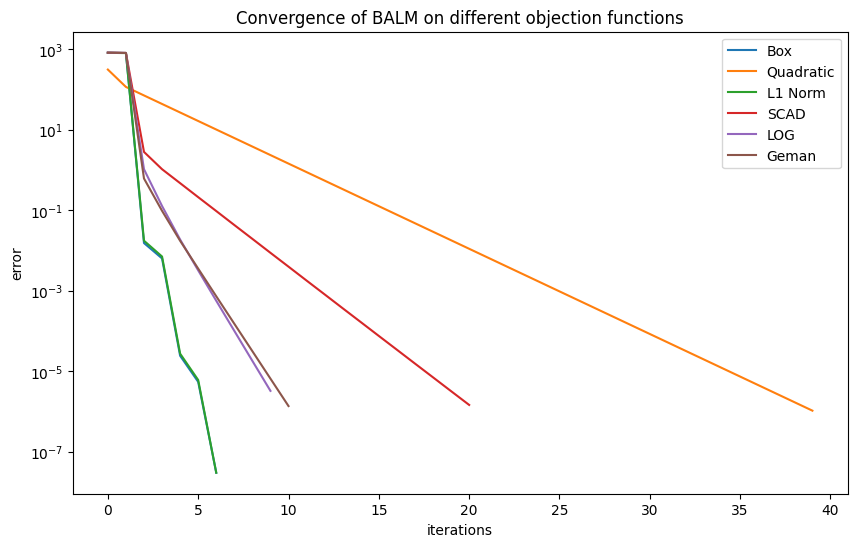

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 你的数据
geman = [819.9999859207212, 808.0065770868491, 0.018948511942462054, 0.006417623508554904, 2.2825461067244035e-05, 5.542334275632221e-06, 2.7397345836455145e-08,]
box = [820.0, 808.0016723753869, 0.015423093468120763, 0.006405486509926561, 2.458494418011714e-05, 5.524901064646315e-06, 3.065839637717005e-08]
quadratic = [313.0732137793634, 116.07729944084414, 71.32403504948871, 43.82549262401346, 26.928843999616134, 16.546594130563335, 10.167156721382085, 6.247272094903314, 3.838674832097596, 2.358697402632505, 1.4493161519206441, 0.8905412391922638, 0.5471985511930304, 0.3362295210972712, 0.20659830072532204, 0.1269455986946162, 0.0780025051914528, 0.04792911985570947, 0.02945034296101201, 0.018095944656764118, 0.011119164669568748, 0.006832239226549408, 0.004198111479319033, 0.0025795554583571967, 0.0015850237408379098, 0.0009739276007425524, 0.0005984358132071765, 0.0003677125714374174, 0.00022594325438984875, 0.00013883222427812925, 8.530631527459143e-05, 5.24169908220351e-05, 3.220794283831374e-05, 1.9790368841254846e-05, 1.2160314012854556e-05, 7.471979831086273e-06, 4.591204024295692e-06, 2.8210935791861402e-06, 1.7334383226597083e-06, 1.065121865817531e-06]
l1_norm = [815.0, 803.0020225245812, 0.01764277027856076, 0.007141193500451504, 2.7716338999561607e-05, 6.143633089594758e-06,3.065839637717005e-08]
l2_norm = [313.0732137793634, 116.07729944084414, 71.32403504948871, 43.82549262401346, 26.928843999616134, 16.546594130563335, 10.167156721382085, 6.247272094903314, 3.838674832097596, 2.358697402632505, 1.4493161519206441, 0.8905412391922638, 0.5471985511930304, 0.3362295210972712, 0.20659830072532204, 0.1269455986946162, 0.0780025051914528, 0.04792911985570947, 0.02945034296101201, 0.018095944656764118, 0.011119164669568748, 0.006832239226549408, 0.004198111479319033, 0.0025795554583571967, 0.0015850237408379098, 0.0009739276007425524, 0.0005984358132071765, 0.0003677125714374174, 0.00022594325438984875, 0.00013883222427812925, 8.530631527459143e-05, 5.24169908220351e-05, 3.220794283831374e-05, 1.9790368841254846e-05, 1.2160314012854556e-05, 7.471979831086273e-06, 4.591204024295692e-06, 2.8210935791861402e-06, 1.7334383226597083e-06, 1.065121865817531e-06]
scad = [820.0, 810.1008720688735, 2.824849321009053, 1.0510045485443578, 0.47360258578748204, 0.21274129532725194, 0.09617052503852574, 0.043279151011820116, 0.0195895696950682, 0.008830824043806085, 0.004001908960737821, 0.001806903210232469, 0.0008197574343119518, 0.00037067708482207973, 0.00016834313131408596, 7.622548067842683e-05, 3.465087664500377e-05, 1.5709635921123954e-05, 7.1476079167576145e-06, 3.2442478176131218e-06, 1.4772589230771516e-06]
log = [819.9681090950696, 808.9062597991976, 1.050016080990721, 0.12800020745527207, 0.018871609530297095, 0.0032368658983698007, 0.0005696096221751157, 0.00010182736220776256, 1.8313732820018913e-05, 3.302342008404402e-06]
geman_sigma = [819.9985920201519, 808.5346385585253, 0.6180472013315931, 0.09726083331123625, 0.017566820611022993, 0.003577919973580812, 0.0007363700963041175, 0.0001529830357256401, 3.186075948624634e-05, 6.64178862952447e-06, 1.3852016240711862e-06]

plt.figure(figsize=(10, 6))

plt.plot(box, label='Box')
plt.plot(quadratic, label='Quadratic')
plt.plot(l1_norm, label='L1 Norm')
plt.plot(scad, label='SCAD')
plt.plot(log, label='LOG')
plt.plot(geman_sigma, label='Geman')
plt.title('Convergence of BALM on different objection functions')
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.yscale('log')
plt.show()